In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score , recall_score
from imblearn.over_sampling import SMOTE 

data_df = pd.read_csv('NEW_dataset_csv.csv')
book=pd.read_csv('editted.csv')
print(data_df.shape)
data_df.head()

C:\Users\Sa\AppData\Local\Temp\ipykernel_25124\3926882510.py:12: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv('NEW_dataset_csv.csv')


(460846, 34)


,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,I01,N,163,165,0.069610,-0.083281,0.614133,-0.392761,0.047159,15,...,-0.023370,14,3,23,6,-0.023370,-0.011650,0.082608,0.101373,-0.183387
1,I01,N,165,166,-0.097030,0.597254,-0.078704,-0.078704,-0.137781,3,...,0.081637,15,5,27,7,0.081637,0.102992,0.191225,0.217544,-0.068248
2,I01,N,166,102,0.109399,0.680528,-0.010649,-0.010649,-0.720620,6,...,-0.148539,33,13,52,6,-0.148539,-0.060620,0.081080,0.204400,0.335172
3,I01,VEB,102,231,0.176376,0.256431,-0.101098,-0.707525,-0.101098,4,...,0.046898,21,9,34,4,0.046898,0.083728,0.279512,0.526785,0.450969
4,I01,N,231,165,0.585577,0.607461,-0.083499,-0.083499,-0.167858,3,...,-0.112552,32,5,43,6,-0.112552,0.012989,0.091491,0.134004,0.265232


In [2]:
x_data = data_df.iloc[:, 2:]
y_label = data_df[['type']]
z_label = data_df[['type']]
z_label.value_counts()
y_label.replace(['VEB', 'SVEB', 'F', 'Q'], 'Arrhythmia', inplace=True)
y_label.replace(['N'], 'Normal', inplace=True)

C:\Users\Sa\AppData\Local\Temp\ipykernel_25124\1430154249.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_label.replace(['VEB', 'SVEB', 'F', 'Q'], 'Arrhythmia', inplace=True)
C:\Users\Sa\AppData\Local\Temp\ipykernel_25124\1430154249.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_label.replace(['N'], 'Normal', inplace=True)


In [3]:
data_df["type"].replace({'N':'0', 'VEB':'1','SVEB':'1','F':'1','Q':'1'},inplace=True)

C:\Users\Sa\AppData\Local\Temp\ipykernel_25124\1976196583.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_df["type"].replace({'N':'0', 'VEB':'1','SVEB':'1','F':'1','Q':'1'},inplace=True)


In [4]:
data_df.head(5)

,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,I01,0,163,165,0.069610,-0.083281,0.614133,-0.392761,0.047159,15,...,-0.023370,14,3,23,6,-0.023370,-0.011650,0.082608,0.101373,-0.183387
1,I01,0,165,166,-0.097030,0.597254,-0.078704,-0.078704,-0.137781,3,...,0.081637,15,5,27,7,0.081637,0.102992,0.191225,0.217544,-0.068248
2,I01,0,166,102,0.109399,0.680528,-0.010649,-0.010649,-0.720620,6,...,-0.148539,33,13,52,6,-0.148539,-0.060620,0.081080,0.204400,0.335172
3,I01,1,102,231,0.176376,0.256431,-0.101098,-0.707525,-0.101098,4,...,0.046898,21,9,34,4,0.046898,0.083728,0.279512,0.526785,0.450969
4,I01,0,231,165,0.585577,0.607461,-0.083499,-0.083499,-0.167858,3,...,-0.112552,32,5,43,6,-0.112552,0.012989,0.091491,0.134004,0.265232


In [5]:
x_data = data_df.iloc[:, 2:]
y_label = data_df[['type']]
z_label = data_df[['type']]
z_label.value_counts()

type
0       405824
1        55022
Name: count, dtype: int64

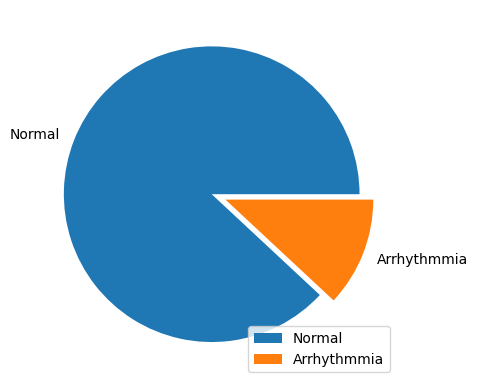

In [6]:
compare=y_label.value_counts()
plt.pie( compare,labels=['Normal','Arrhythmmia'],explode=[0,0.1])
plt.legend()
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_label, random_state=101,test_size=0.3)

In [8]:
y_test.shape

(138254, 1)

In [9]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)
print(min_max_scaler.scale_)

[0.00047326 0.00047304 0.06768416 0.07875078 0.08591588 0.0842764
 0.09763499 0.00588235 0.00671141 0.00302115 0.00714286 0.09763499
 0.09453222 0.08621611 0.08466193 0.08343954 0.00047326 0.00047304
 0.10266912 0.10530541 0.12558189 0.10789525 0.09528067 0.00384615
 0.00543478 0.00251256 0.00568182 0.09528067 0.11766062 0.11904118
 0.12779076 0.12352038]


In [10]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [11]:
X_test_scaled_df

,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,0_pq_interval,0_qt_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,0.095125,0.099811,0.289547,0.615238,0.718082,0.611591,0.690487,0.164706,0.060403,0.126888,...,0.588638,0.015385,0.097826,0.075377,0.045455,0.588638,0.544708,0.470832,0.442232,0.466125
1,0.027449,0.028382,0.294007,0.668730,0.604646,0.665427,0.674690,0.029412,0.020134,0.027190,...,0.612242,0.003846,0.005435,0.015075,0.022727,0.612242,0.573857,0.519262,0.515462,0.553895
2,0.088973,0.090350,0.275868,0.663665,0.587545,0.585475,0.656112,0.070588,0.053691,0.099698,...,0.574498,0.015385,0.027174,0.050251,0.062500,0.574498,0.527247,0.451097,0.422939,0.451521
3,0.094179,0.096026,0.285799,0.635619,0.633037,0.678663,0.693880,0.076471,0.040268,0.063444,...,0.614857,0.023077,0.005435,0.060302,0.096591,0.614857,0.565651,0.495789,0.472326,0.496064
4,0.058684,0.059603,0.288953,0.662157,0.606769,0.667509,0.688623,0.005882,0.053691,0.036254,...,0.612904,0.023077,0.005435,0.035176,0.039773,0.612904,0.558815,0.480921,0.446150,0.462642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138249,0.084240,0.085147,0.274271,0.614281,0.682841,0.631146,0.675856,0.088235,0.020134,0.069486,...,0.618771,0.084615,0.021739,0.082915,0.039773,0.618771,0.582524,0.529614,0.541035,0.557954
138250,0.026029,0.026017,0.321954,0.672357,0.787365,0.555946,0.686654,0.100000,0.060403,0.157100,...,0.598550,0.015385,0.000000,0.012563,0.005682,0.598550,0.556949,0.503114,0.500338,0.540967
138251,0.158542,0.150426,0.285934,0.634399,0.621375,0.633374,0.695280,0.070588,0.006711,0.054381,...,0.615996,0.057692,0.032609,0.077889,0.056818,0.615996,0.580467,0.532614,0.521910,0.531850
138252,0.126361,0.123463,0.284659,0.781606,0.778064,0.835536,0.693632,0.088235,0.013423,0.048338,...,0.576330,0.015385,0.048913,0.070352,0.085227,0.576330,0.529509,0.464840,0.448543,0.483652


In [12]:
from sklearn.ensemble import RandomForestClassifier

RAND = RandomForestClassifier(random_state=101, n_estimators=50)
RAND.fit(X_train_scaled_df, y_train)
print('Accuracy for the train data', RAND.score(X_train_scaled_df, y_train.values.ravel()))

C:\Users\Sa\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy for the train data 0.9999442019640908


In [13]:
from sklearn import metrics
y_pred = RAND.predict(X_test_scaled_df)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("*** Confusion Matrix ***")
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.9884704963328367
*** Confusion Matrix ***
[[121312    507]
 [  1087  15348]]


In [14]:
y_pred = RAND.predict(X_test_scaled_df)

In [15]:
y_pred

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [16]:
recall_score(y_test,y_pred,pos_label='0')

0.9958380876546351

In [17]:
precision_score(y_test,y_pred,pos_label='0')

0.9911192084902655

In [18]:
f1_score(y_test, y_pred,pos_label='0')

0.9934730445749289

In [19]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

0.9441103002486787

In [20]:
accuracy_score(y_test,y_pred)

0.9884704963328367